# Reading images

In [1]:
directory = "/Users/evamanukyan/RV-Mignot-hands-on-project/data/raw/Final_Training/Images/00000/00000_00000.ppm"

In [65]:
TRAINING_CSV_PATH = "/Users/evamanukyan/RV-Mignot-hands-on-project/data/raw/Final_Training/Images/*/*.csv"

IMAGE_WIDTH = 30
IMAGE_HEIGHT = IMAGE_WIDTH

In [61]:
#permet de faire les recherches des chemins d'accès 
import glob

#Pour récupérer le chemin du fichier
import os
import pathlib 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from PIL import Image  

In [33]:
os.path.dirname(TRAINING_CSV_PATH)

'/Users/evamanukyan/RV-Mignot-hands-on-project/data/raw/Final_Training/Images/*'

In [47]:
#/Images/*/*.csv les étoiles servent à retrouver tous les fichier csv dans Images
#Ici juste une illustration 
#[ c for c in glob.glob(TRAINING_CSV_PATH)]

In [ ]:
l1 = [1,2,3,4]
l2 = ["a", "b", "c", "d"]

for (e1,e2) in zip(l1,l2):
    print(e1,e2)

In [91]:
def build_images_database(path):
    #PEP8 la convention d'écriture de code: regarder sur internet 
    '''Build a pandas DataFrame with all images
    
    Parameters
    ----------
    path: path pattern to read csv files containing images information
    
    Return
    ----------
    A pandas Dataframe with one line per image''' 
    
    df_list = []
    for filename in glob.glob(TRAINING_CSV_PATH):
        df = pd.read_csv(filename, sep=";")
        df["path"] = os.path.dirname(filename) + '/' + df["Filename"]
        df_list.append(df)
        
    return pd.concat(df_list, ignore_index = True)



def build_images_list(filename_list, boxes_list = None):
    
    """Build a list of images as Numpy array
    
    Parameters
    ----------
    filename_list : list of images filenames
    boxes_list: optional list of boxes for clipping within images. Boxes are 4-tuples (x1,y1,x2,y2)
    
    Retruns
    ---------
    A list of images as Numpy arrays
    """
    
    #If no box list is given , so generate a fake box list with no box
    #image_resize will take true size of images if argument box == None
 
    if boxes_list is None:
        boxes_list = [None] * len(filename_list)
    
    assert len(filename_list) == len(boxes_list), "filenames and boxes lists must have the same size"
    
    images_list = []
    for (filename, images_box) in zip(filename_list, boxes_list) :
        image = Image.open(filename)
        image.resize((IMAGE_WIDTH, IMAGE_HEIGHT), box = (images_box)) #box argument clips image to (x1,y1, x2, y2)
        image = np.array(image)
        images_list.append(image)
    
    return images_list



In [87]:
images_df = build_images_database(TRAINING_CSV_PATH)
images_df

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000_00000.ppm,38,35,5,5,33,30,31,/Users/evamanukyan/RV-Mignot-hands-on-project/...
1,00000_00001.ppm,40,36,6,5,34,31,31,/Users/evamanukyan/RV-Mignot-hands-on-project/...
2,00000_00002.ppm,40,37,5,5,34,32,31,/Users/evamanukyan/RV-Mignot-hands-on-project/...
3,00000_00003.ppm,41,39,6,6,36,34,31,/Users/evamanukyan/RV-Mignot-hands-on-project/...
4,00000_00004.ppm,43,37,6,5,38,32,31,/Users/evamanukyan/RV-Mignot-hands-on-project/...
...,...,...,...,...,...,...,...,...,...
39204,00017_00025.ppm,97,87,8,8,89,80,28,/Users/evamanukyan/RV-Mignot-hands-on-project/...
39205,00017_00026.ppm,105,95,9,9,96,87,28,/Users/evamanukyan/RV-Mignot-hands-on-project/...
39206,00017_00027.ppm,119,105,11,9,109,96,28,/Users/evamanukyan/RV-Mignot-hands-on-project/...
39207,00017_00028.ppm,135,123,11,11,124,113,28,/Users/evamanukyan/RV-Mignot-hands-on-project/...


In [ ]:
# Reading only 50 images for the moment
images_list = build_images_list(images_df.head(50)['path'].values,
                                images_df.head(50).apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                                         axis=1).values)

In [86]:
images_list[0]

array([[[ 82,  93, 111],
        [ 90, 102, 123],
        [ 99, 113, 132],
        ...,
        [ 81,  91, 103],
        [ 89, 101, 113],
        [ 85,  99, 110]],

       [[ 78,  88, 107],
        [ 84,  94, 114],
        [ 93, 104, 120],
        ...,
        [ 74,  83,  92],
        [ 76,  86,  95],
        [ 76,  87,  96]],

       [[ 76,  85, 101],
        [ 78,  87, 103],
        [ 85,  94, 108],
        ...,
        [ 64,  72,  80],
        [ 66,  74,  83],
        [ 68,  76,  86]],

       ...,

       [[ 35,  36,  40],
        [ 38,  38,  42],
        [ 36,  36,  41],
        ...,
        [ 35,  37,  41],
        [ 33,  35,  40],
        [ 31,  33,  39]],

       [[ 38,  39,  42],
        [ 37,  38,  41],
        [ 36,  37,  41],
        ...,
        [ 34,  35,  40],
        [ 33,  35,  41],
        [ 33,  35,  42]],

       [[ 35,  37,  42],
        [ 34,  36,  40],
        [ 35,  37,  42],
        ...,
        [ 32,  33,  39],
        [ 31,  33,  39],
        [ 31,  33,  39]]

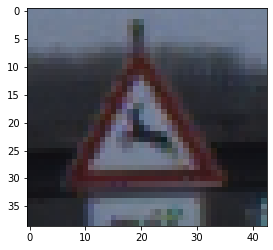

In [90]:
plt.imshow(images_list[5])

## Some descriptive statistics 

In [43]:
images_df["Width"].value_counts()

34     1327
35     1323
31     1319
33     1316
30     1304
       ... 
183       1
173       1
162       1
229       1
226       1
Name: Width, Length: 187, dtype: int64

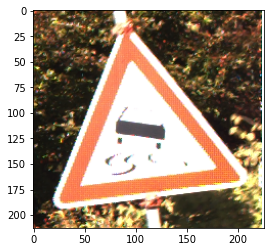

In [88]:
plt.imshow(Image.open(images_df.query("Width ==226")["path"].values[0]))

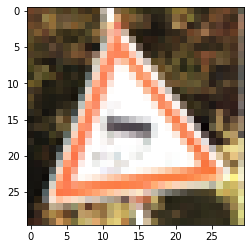

In [60]:
#resizing the image 
plt.imshow(Image.open(images_df.query("Width ==226")["path"].values[0]).resize((30,30)))

In [84]:
# reading only first 50 images 
images_list = build_images_list(images_df["path"].values[:50])

In [80]:
images_list[0]

array([[[ 82,  93, 111],
        [ 90, 102, 123],
        [ 99, 113, 132],
        ...,
        [ 81,  91, 103],
        [ 89, 101, 113],
        [ 85,  99, 110]],

       [[ 78,  88, 107],
        [ 84,  94, 114],
        [ 93, 104, 120],
        ...,
        [ 74,  83,  92],
        [ 76,  86,  95],
        [ 76,  87,  96]],

       [[ 76,  85, 101],
        [ 78,  87, 103],
        [ 85,  94, 108],
        ...,
        [ 64,  72,  80],
        [ 66,  74,  83],
        [ 68,  76,  86]],

       ...,

       [[ 35,  36,  40],
        [ 38,  38,  42],
        [ 36,  36,  41],
        ...,
        [ 35,  37,  41],
        [ 33,  35,  40],
        [ 31,  33,  39]],

       [[ 38,  39,  42],
        [ 37,  38,  41],
        [ 36,  37,  41],
        ...,
        [ 34,  35,  40],
        [ 33,  35,  41],
        [ 33,  35,  42]],

       [[ 35,  37,  42],
        [ 34,  36,  40],
        [ 35,  37,  42],
        ...,
        [ 32,  33,  39],
        [ 31,  33,  39],
        [ 31,  33,  39]]

In [52]:
images_df["ClassId"].max()

42

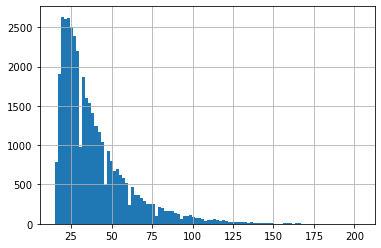

In [54]:
#Por calculer la taille actuelle de l'image 
(images_df["Roi.X2"] - images_df["Roi.X1"]).hist(bins = 100)

In [56]:
(images_df["Roi.X2"] - images_df["Roi.X1"]).median()

33.0

In [92]:
images_df["ClassId"].value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
8     1410
3     1410
11    1320
18    1200
35    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
34     420
6      420
16     420
22     390
36     390
40     360
20     360
21     330
39     300
24     270
29     270
32     240
42     240
41     240
27     240
37     210
19     210
0      210
Name: ClassId, dtype: int64

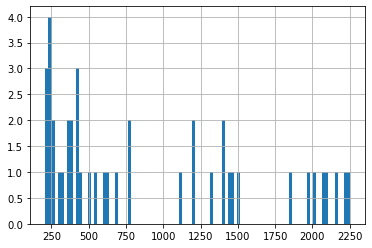

In [93]:
images_df["ClassId"].value_counts().hist(bins = 100)

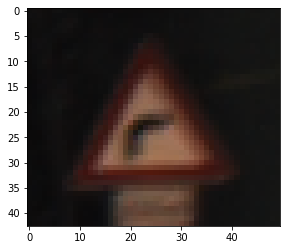

In [99]:
plt.imshow(Image.open(images_df.query("ClassId == 20").iloc[50]["path"]))